In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set_theme('notebook')
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth",100)
pd.options.display.float_format = '{:,.2f}'.format

# Thành viên nhóm
| Họ và tên      | MSSV |
| ----------- | ----------- |
| Nguyễn Phú Thụ| 19120673|
| Lê Anh Vũ| 19120724|

# 1. Bank marketing dataset

## 1.1. Mô tả dữ liệu 
- <span style="font-size:17px;font-family: Times New Roman;"> Dữ liệu này dựa trên "Bank Marketing" UCI dataset. </span>
- <span style="font-size:17px;font-family: Times New Roman;">Dữ liệu được làm rõ bằng cách bổ sung một số thuộc tính kinh tế và xã hội (chỉ số toàn quốc từ một quốc gia có dân số ~10 triệu người), do Banco de Portugal xuất bản và có sẵn công khai tại: https://www.bportugal.pt/estatisticasweb </span>
- <span style="font-size:17px;font-family: Times New Roman;"> Bộ dữ liệu này gần giống với bộ dữ liệu được sử dụng trong [Moro et al., 2014] (nó không bao gồm tất cả các thuộc tính do lo ngại về quyền riêng tư) </span>
- <span style="font-size:17px;font-family: Times New Roman;">Ý nghĩa các trường thuộc tính trong dataset:</span>
    | Syntax      | Description |
    | ----------- | ----------- |
    | age | tuổi|
    | job   | công việc |
    | marital      | tình trạng hôn nhân |
    | education |  trình độ học vấn |
    | default    |  có tính dụng mặc định |
    | housing   | có khoản vay nhà cửa |
    | loan | có khoản vay cá nhân |
    | contact | phương thức liên hệ(cellular, telephone)|
    | month   | tháng cuối của liên hệ gần nhất|
    | day_of_week | ngày trong tuần của liên hệ gần nhất |
    | duration | thời lượng của liên hệ gần nhất|
    | pdays | số ngày đã qua kể từ cuộc liên hệ gần nhất đối với khách hàng, 999 tức là chưa liên hệ với khách hàng này. |
    | campaign    | số lượng liên hệ trong suốt campaign đối với khách hàng này  |
    | previous   | số lượng liên hệ trước khi diễn ra campaign đối với khách hàng này |
    | poutcome | kết quả của chiến dịch marketing trước đó. |
    | emp.var.rate   | employment variation rate  - quarterly indicator|
    | cons.price.idx      | consumer price index - monthly indicator|
    | cons.conf.idx | consumer confidence index - monthly indicator |
    | euribor3m    |  euribor 3 month rate - daily indicator |
    | nr.employed   |  euribor 3 month rate - quarterly indicator |
    | y | khách hàng có đăng ký gửi tiền vào ngân hàng |

## 1.2 Bài toán
- <span style="font-size:17px;font-family: Times New Roman;">Dự báo khả năng khách hàng có thực hiện đăng ký gửi tiền tại ngân hàng hay không ? </span>
- <span style="font-size:17px;font-family: Times New Roman;">Từ đó giúp ngân hàng có chiến dịch quảng cáo cũng như tư vấn đúng nhóm khách hàng mục tiêu. </span>

# 2. Khám phá dữ liệu

In [2]:
bank_df = pd.read_csv('bank-additional-full.csv',delimiter=';')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,"5,191.00",no


## 2.1 Dữ liệu có bao nhiêu dòng và cột

In [3]:
print(f'Dữ liệu có {bank_df.shape[0]} dòng')
print(f'Dữ liệu có {bank_df.shape[1]} cột')

Dữ liệu có 41188 dòng
Dữ liệu có 21 cột


## 2.2 Dữ liệu có bị trùng lặp không ?

In [4]:
num_dup = bank_df.duplicated().sum()
print(f'Dữ liệu bị trùng {num_dup} dòng')

Dữ liệu bị trùng 12 dòng


In [5]:
# remove duplicated
bank_df.drop_duplicates(inplace=True)
bank_df.reset_index().drop(columns = 'index', inplace=True)

## 2.3 Kiểu dữ liệu có gì bất thường không ?

In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

<span style="font-size:18px;font-family: Times New Roman;"> **Nhận xét**:</span>
- <span style="font-size:17px;font-family: Times New Roman;"> Kiểu dữ liệu không có gì bất thường. </span>

## 2.4 Mỗi thuộc tính có bị thiếu hay không ?
<span style="font-size:19px;font-family: Times New Roman;"> Theo mô tả của tác giả thì giá trị thiếu thể hiện là "unknown"</span>

In [7]:
bank_df.replace('unknown', np.nan, inplace=True)
bank_df.isna().sum(axis = 0)

age                  0
job                330
marital             80
education         1730
default           8596
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

<span style="font-size:18px;font-family: Times New Roman;"> **Nhận xét**:</span>
- <span style="font-size:17px;font-family: Times New Roman;"> Số lượng dữ liệu bị thiếu khá là nhiều, như cột default, education. </span>
- <span style="font-size:17px;font-family: Times New Roman;">Nếu như default, housing, loan là những thông tin nhạy cảm nên khách hàng có thể từ chối trả lời thì những thông tin cơ bản như marital, job, contact là những thông tin cơ bản nên việc thiếu giá trị sẽ khó xảy ra. </span>
- <span style="font-size:17px;font-family: Times New Roman;">Nhóm sẽ khám phá để hiểu hơn trước khi quyết định xử lý giá trị thiếu. Vì giá trị "unknown" trong ngữ cảnh này là một giá trị khá thú vị: </span>
    - <span style="font-size:17px;font-family: Times New Roman;"> "unknown" có thể là do bộ phận thu thập của ngân hàng thiếu sót. </span>
    - <span style="font-size:17px;font-family: Times New Roman;"> "unknown" có thể là do khách hàng thực sự không quan tâm tới dịch vụ của ngân hàng. </span>

## 2.5 Thống kê dữ liệu về khách hàng

In [8]:
client_data = bank_df[['age', 'job', 'marital','education', 
                       'default', 'housing', 'loan']]
client_data.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,NaN,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


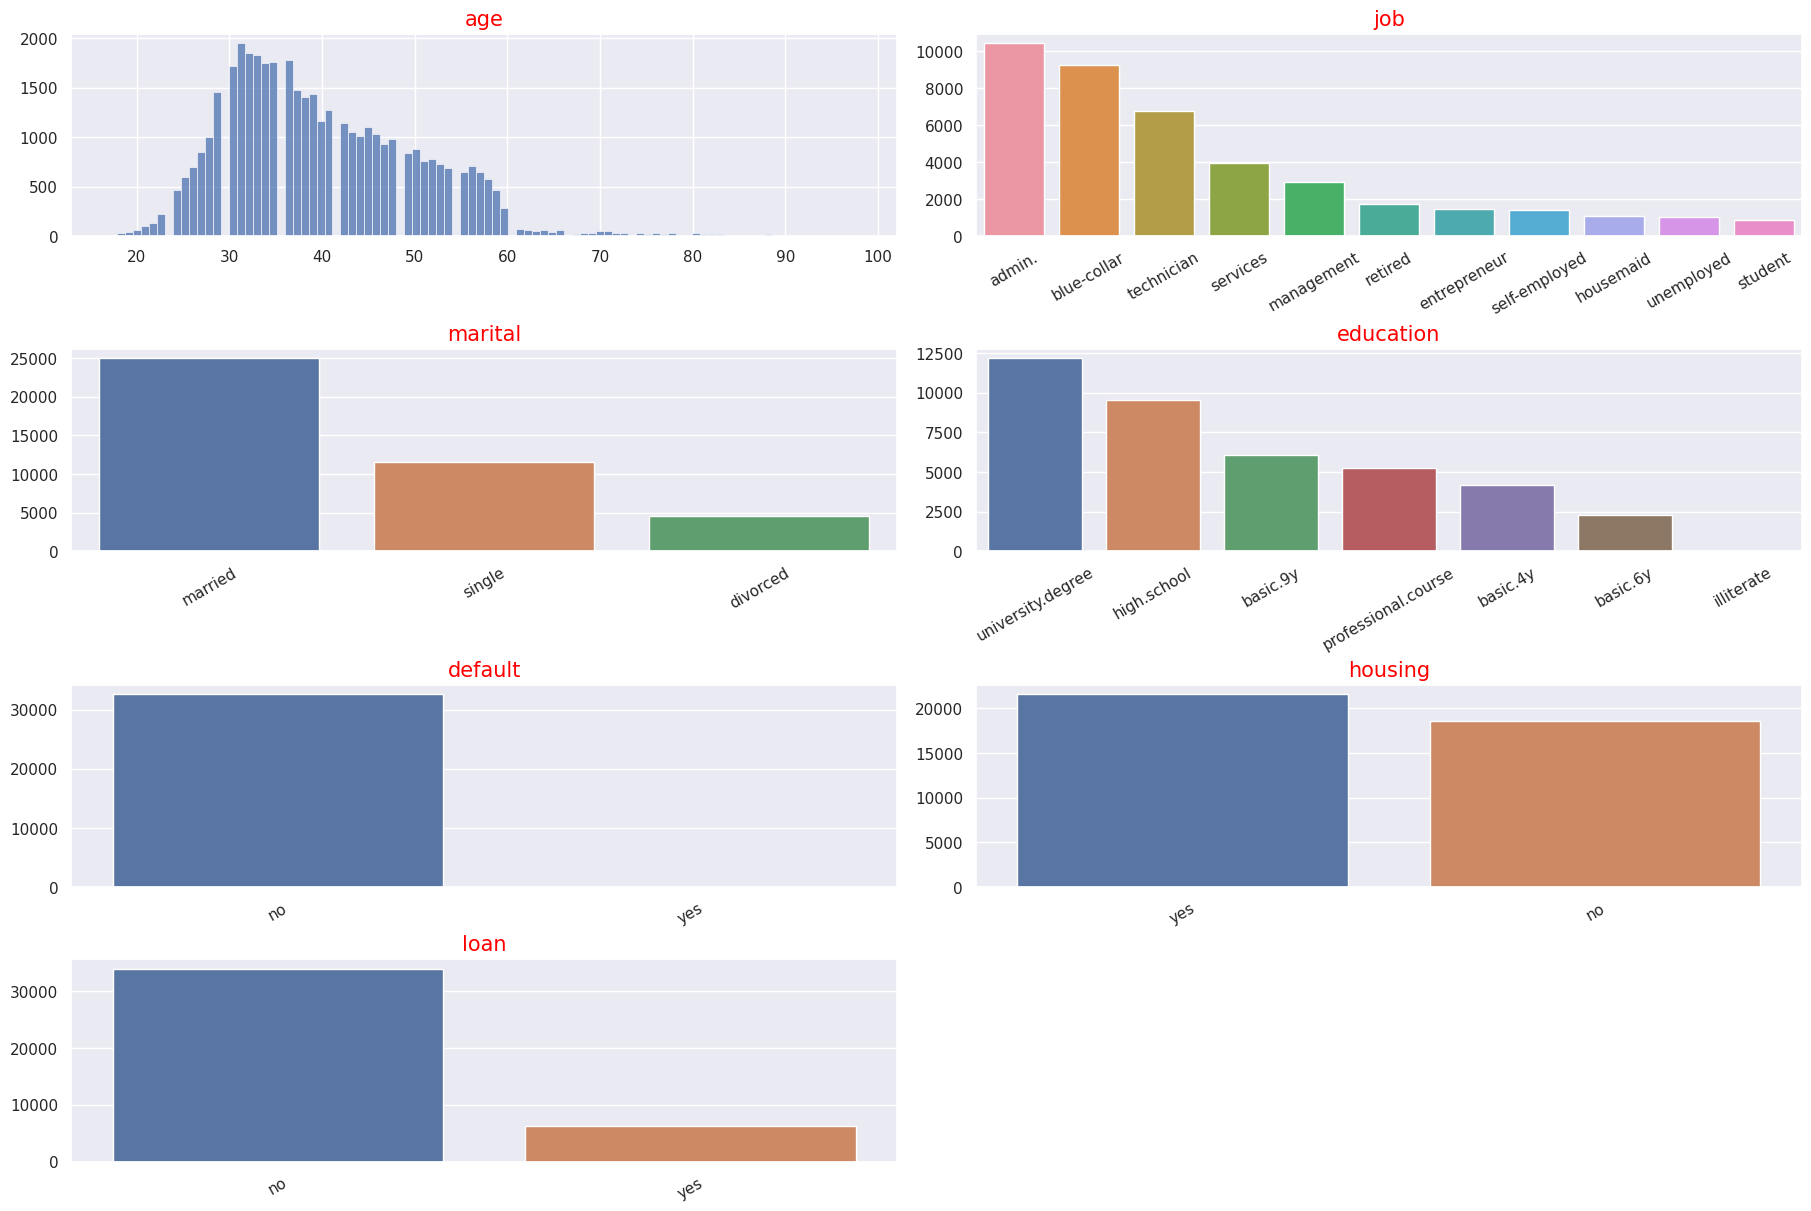

In [9]:
fig, axs = plt.subplots(4,2,figsize = (18,12), constrained_layout = True)
for idx in range(client_data.shape[1]):
    r, c = idx // 2, idx % 2
    if client_data.columns[idx] == 'age':
        sns.histplot( data = client_data.iloc[:,idx], ax = axs[r,c])
    else:
        data = client_data.iloc[:,idx].value_counts()
        sns.barplot(x = data.index, y = data.values , ax = axs[r,c])
        axs[r,c].tick_params(axis = 'x', rotation = 30)
        
    axs[r,c].set_title(f'{client_data.columns[idx]}', fontsize = 15, color = 'red')
    axs[r,c].xaxis.label.set_visible(False)
    axs[r,c].yaxis.label.set_visible(False)

axs[3,1].set_visible(False)

<span style="font-size:18px;font-family: Times New Roman;"> **Nhận xét**:</span>
- <span style="font-size:17px;font-family: Times New Roman;"> Age phân bố theo phân phối chuẩn nhưng có vài giá trị chênh lệch giữa phân vị thứ 3 với max giá lớn (47 và 98).</span>
- <span style="font-size:17px;font-family: Times New Roman;">Ở những thuộc tính category như job, marital và education thì có phân sự phân hóa rất rõ ràng. Nhóm ngành Admin, blue-collar và technician chiếm tỷ lệ cao ở job, tương tư cho married ở marital và university degree ở education.</span>
- <span style="font-size:17px;font-family: Times New Roman;"> Các thuộc tính còn lại không có gì bất thường</span>

### 2.5.1 Thống kê số lượng các khoản nợ và tỷ lệ đăng ký theo nghề nghiệp

In [10]:
job_df = pd.DataFrame(columns = ['job', 'housing', 'loan'])
group_job_df = bank_df.groupby('job')
columns = ['housing', 'loan']

for name, subset_df in group_job_df:
    row = pd.DataFrame(job_df.columns)
    row['job'] = name
    for column in columns:
        count = subset_df[subset_df[column] == 'yes']
        row[column] = count.shape[0]
    job_df = pd.concat((job_df,row))
    
job_df = job_df.iloc[:,:-1].drop_duplicates().reset_index().drop(columns = 'index')
job_df

,job,housing,loan
0,admin.,5558,1710
1,blue-collar,4710,1366
2,entrepreneur,779,206
3,housemaid,540,154
4,management,1490,439
5,retired,892,240
6,self-employed,740,195
7,services,2049,601
8,student,471,142
9,technician,3613,989


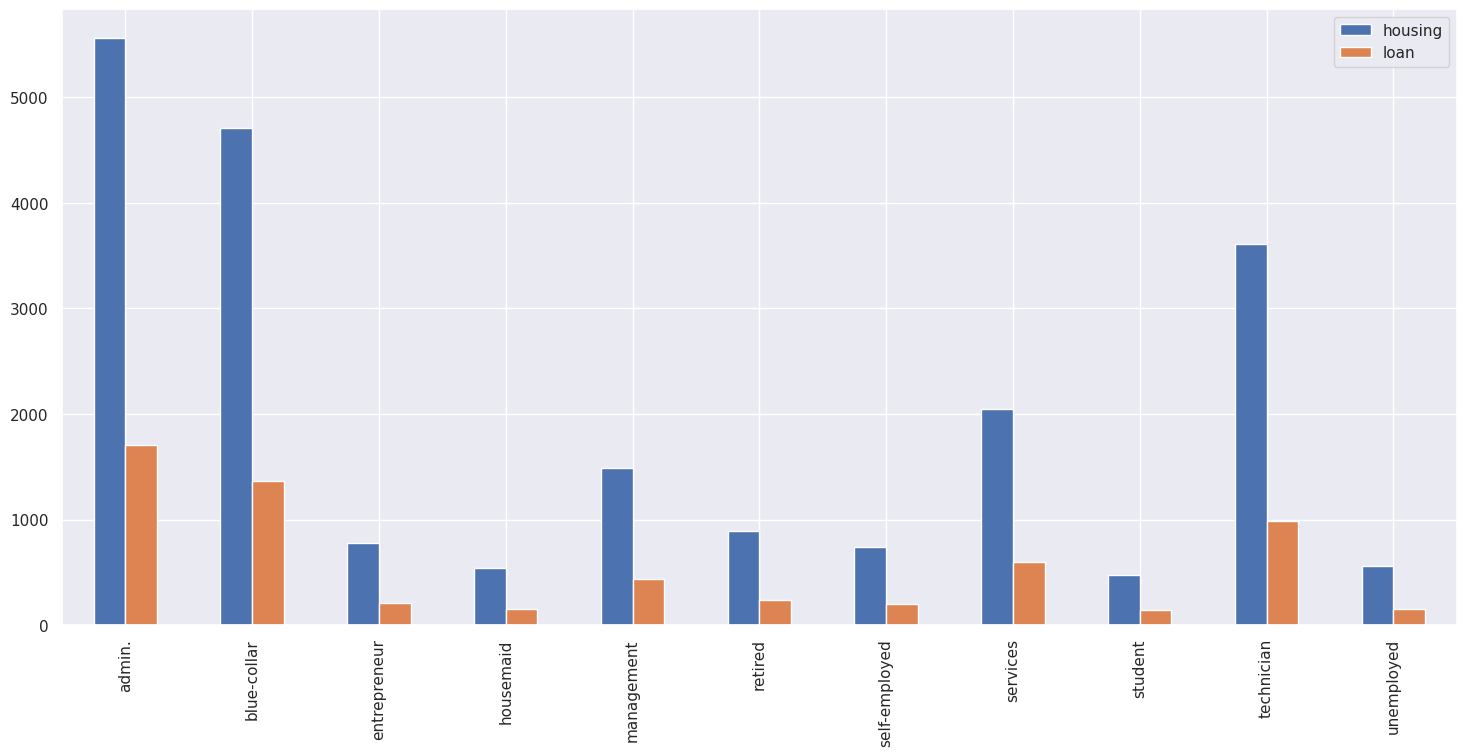

In [11]:
plt.rcParams['figure.figsize'] = (18,8)
ax = job_df.plot.bar()
ax.set_xticks(ticks = np.arange(11),labels = job_df['job'])
plt.show()

<span style="font-size:18px;font-family: Times New Roman;"> **Nhận xét**:</span>
- <span style="font-size:17px;font-family: Times New Roman;">Các khoản vay tập trung chủ yếu vào housing, loan chiếm tỷ trọng không quá lớn.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Nhu cầu về mua nhà đang cao đây là một môi trường kinh doanh mà ngân hàng có thể tham gia với vai trò đối tác trung gian.</span>

### 2.5.2 Thống kế số lượng các khoản nợ và tỷ lệ đăng ký theo tình trạng hôn nhân

In [12]:
marital_df = pd.DataFrame(columns = ['marital','housing', 'loan'])
group_marital_df = bank_df.groupby('marital')
columns = ['housing', 'loan']

for name, subset_df in group_marital_df:
    row = pd.DataFrame(marital_df.columns)
    row['marital'] = name
    for column in columns:
        count = subset_df[subset_df[column] == 'yes']
        row[column] = count.shape[0]
    marital_df = pd.concat((marital_df,row))
    
marital_df = marital_df.iloc[:,:-1].drop_duplicates().reset_index().drop(columns = 'index')
marital_df

,marital,housing,loan
0,divorced,2398,675
1,married,12949,3773
2,single,6189,1788


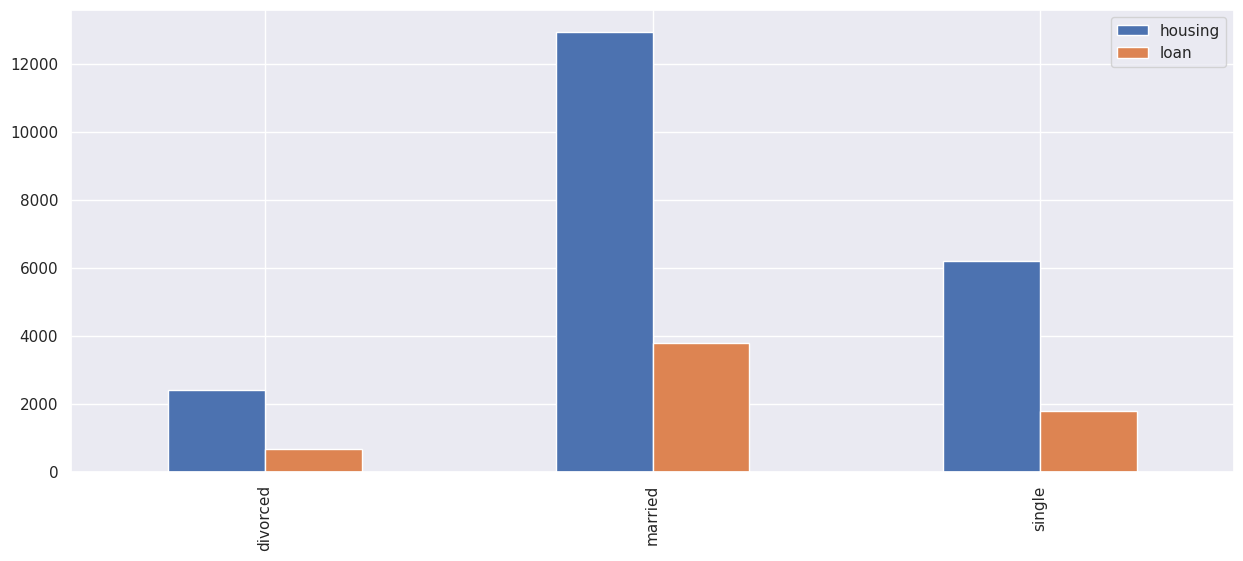

In [13]:
plt.rcParams['figure.figsize'] = (15,6)
ax = marital_df.plot.bar()
ax.set_xticks(ticks = np.arange(3),labels = marital_df['marital'])
plt.show()

<span style="font-size:18px;font-family: Times New Roman;"> **Nhận xét**:</span>
- <span style="font-size:17px;font-family: Times New Roman;">Các khoản vay tập trung chủ yếu vào housing, loan chiếm tỷ trọng không quá lớn.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Một lần nữa càng làm rõ nhu cầu về mua nhà đang cao và đối chiếu với số lượng đi vay chủ yếu của người đã có gia đình(married). Đây là một tập khách hàng mà ngân hàng nên nhắm tới.</span>

## 2.6 Thống kê dữ liệu social và economic

In [14]:
social_data = bank_df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                      'euribor3m', 'nr.employed']]
social_data.describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,"41,176.00","41,176.00","41,176.00","41,176.00","41,176.00"
mean,0.08,93.58,-40.50,3.62,"5,167.03"
std,1.57,0.58,4.63,1.73,72.25
min,-3.40,92.20,-50.80,0.63,"4,963.60"
25%,-1.80,93.08,-42.70,1.34,"5,099.10"
50%,1.10,93.75,-41.80,4.86,"5,191.00"
75%,1.40,93.99,-36.40,4.96,"5,228.10"
max,1.40,94.77,-26.90,5.04,"5,228.10"


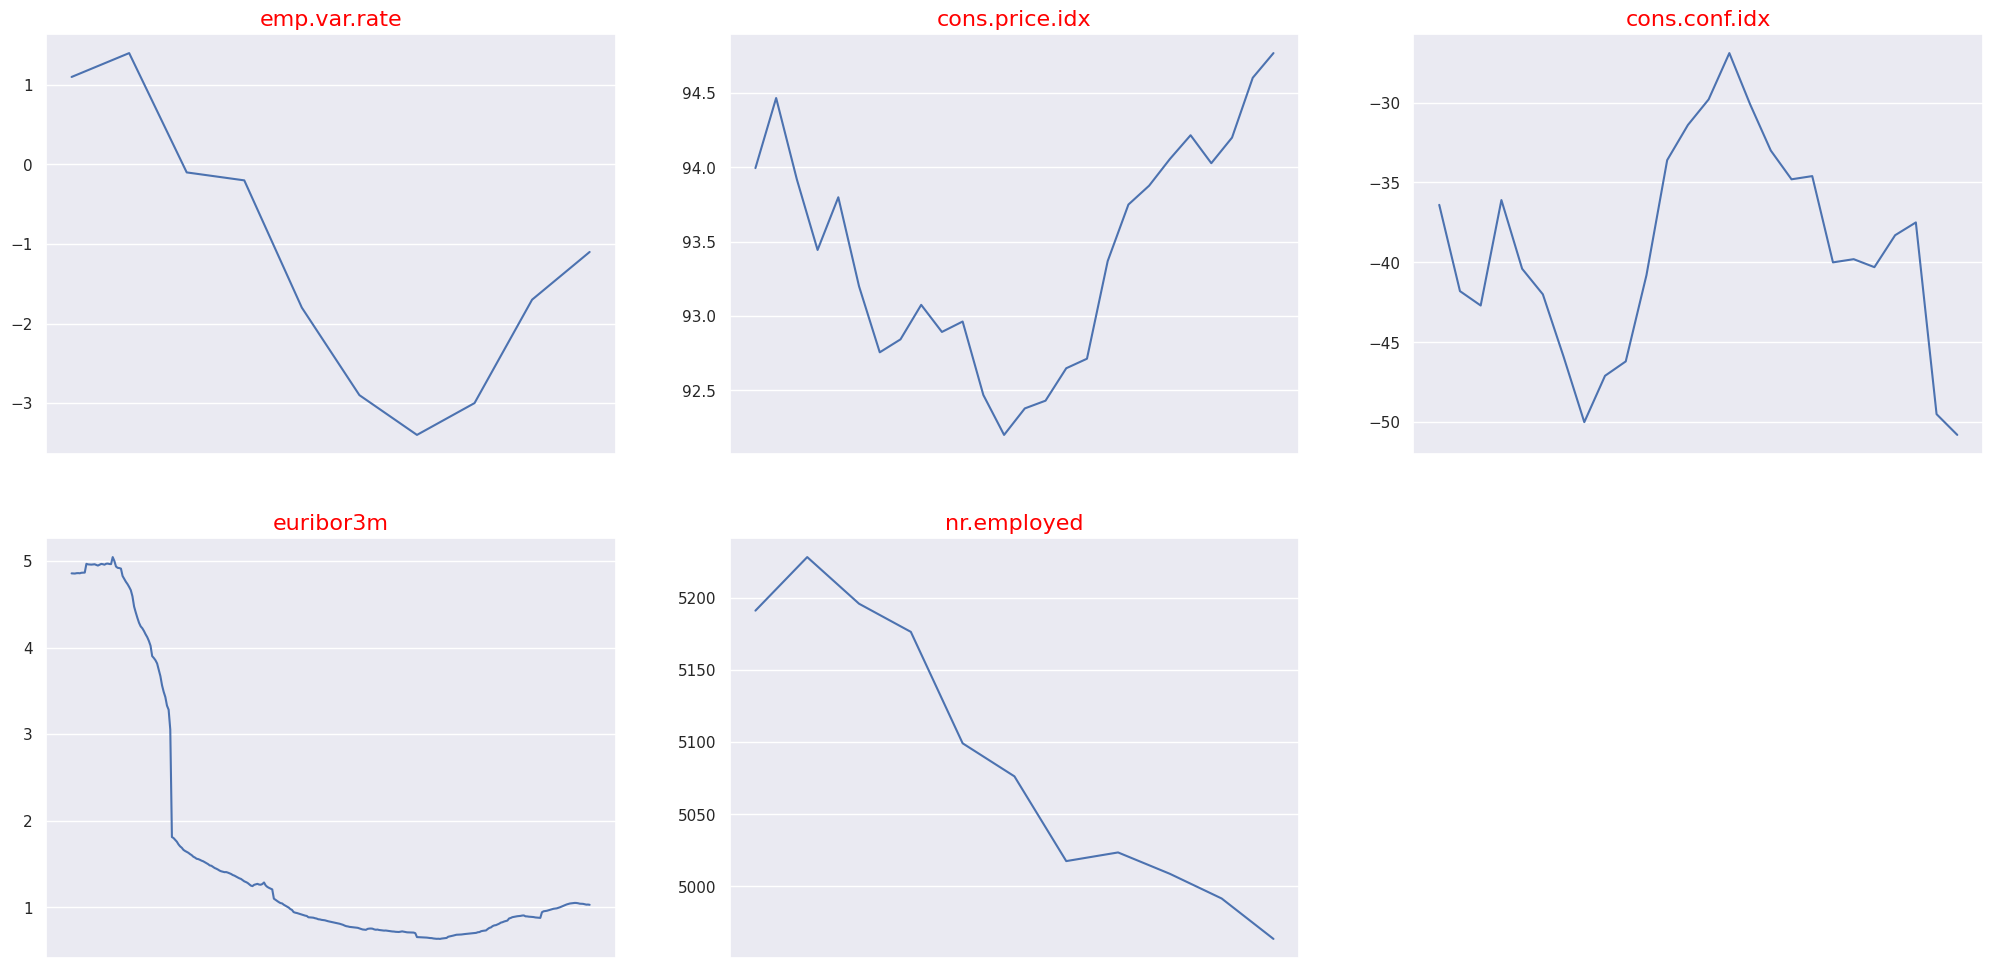

In [15]:
fig, axs = plt.subplots(2,3, figsize = (25,12))
for idx in range(social_data.shape[1]):
    r,c = idx // 3, idx % 3
    sns.lineplot(data = social_data.iloc[:,idx].unique(), ax = axs[r,c])
    axs[r,c].set_title(f'{social_data.columns[idx]}', fontsize = 16, color = 'red')
    axs[r,c].xaxis.set_visible(False)

axs[1,2].set_visible(False)

<span style="font-size:18px;font-family: Times New Roman;"> **Nhận xét**:</span>
- <span style="font-size:17px;font-family: Times New Roman;">Các chỉ số về employment variation rate, consumer, price index và consumer confidence index sau một thời gian giảm thì đều có xu hướng tăng.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Các chỉ số euribor3m và nr.employed thì giảm mạnh.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Nhưng consumer confidence index thì sau khi đạt đỉnh thì vẫn tiếp tục giảm mặc dù euribor3m có giảm. Đây có thể là chính sách của ngân hàng giảm tỷ lệ euribor3m giúp kích cầu số lượng giao dịch và tạo điều kiện cho những người thất nghiệp (qua biểu đồ thấy số lượng nhân viên giảm).</span>

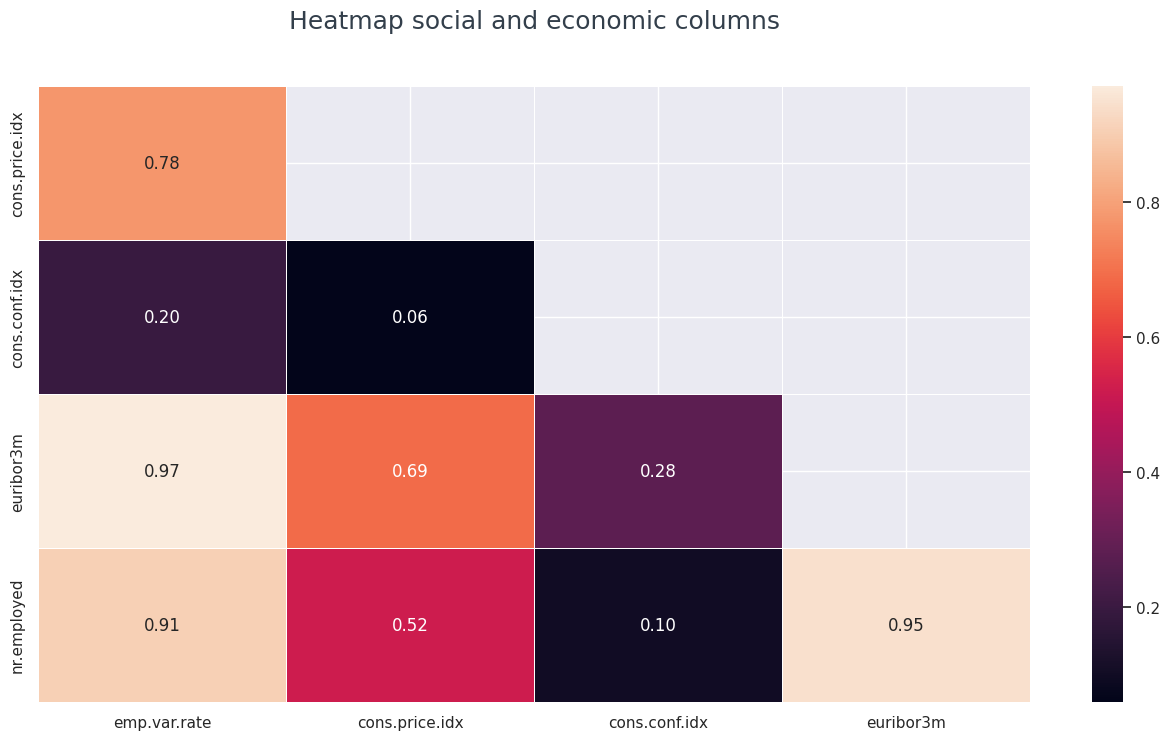

In [16]:
plt.rcParams['figure.figsize'] = 5,3

atm_corr = social_data.corr()
mask = np.ones_like(atm_corr, dtype=bool)

mask = np.triu(mask) 
mask = mask[1:,:-1]
atm_corr = atm_corr.iloc[1:,:-1]

plt.rcParams['figure.figsize'] = 16,8
sns.heatmap(atm_corr, mask = mask, annot = True, 
            fmt = '.2f', linecolor = 'white',linewidths=0.6)
plt.title('Heatmap social and economic columns', fontsize = 18, y=1.08, color = '#333F4B')
plt.show()

## 2.7 Thống kê dữ liệu liên quan đến campaign

In [17]:
campaign_data = bank_df[['contact', 'month', 'day_of_week', 'duration',
                        'campaign', 'pdays', 'previous', 'poutcome']]
campaign_data.describe()

,duration,campaign,pdays,previous
count,"41,176.00","41,176.00","41,176.00","41,176.00"
mean,258.32,2.57,962.46,0.17
std,259.31,2.77,186.94,0.49
min,0.00,1.00,0.00,0.00
25%,102.00,1.00,999.00,0.00
50%,180.00,2.00,999.00,0.00
75%,319.00,3.00,999.00,0.00
max,"4,918.00",56.00,999.00,7.00


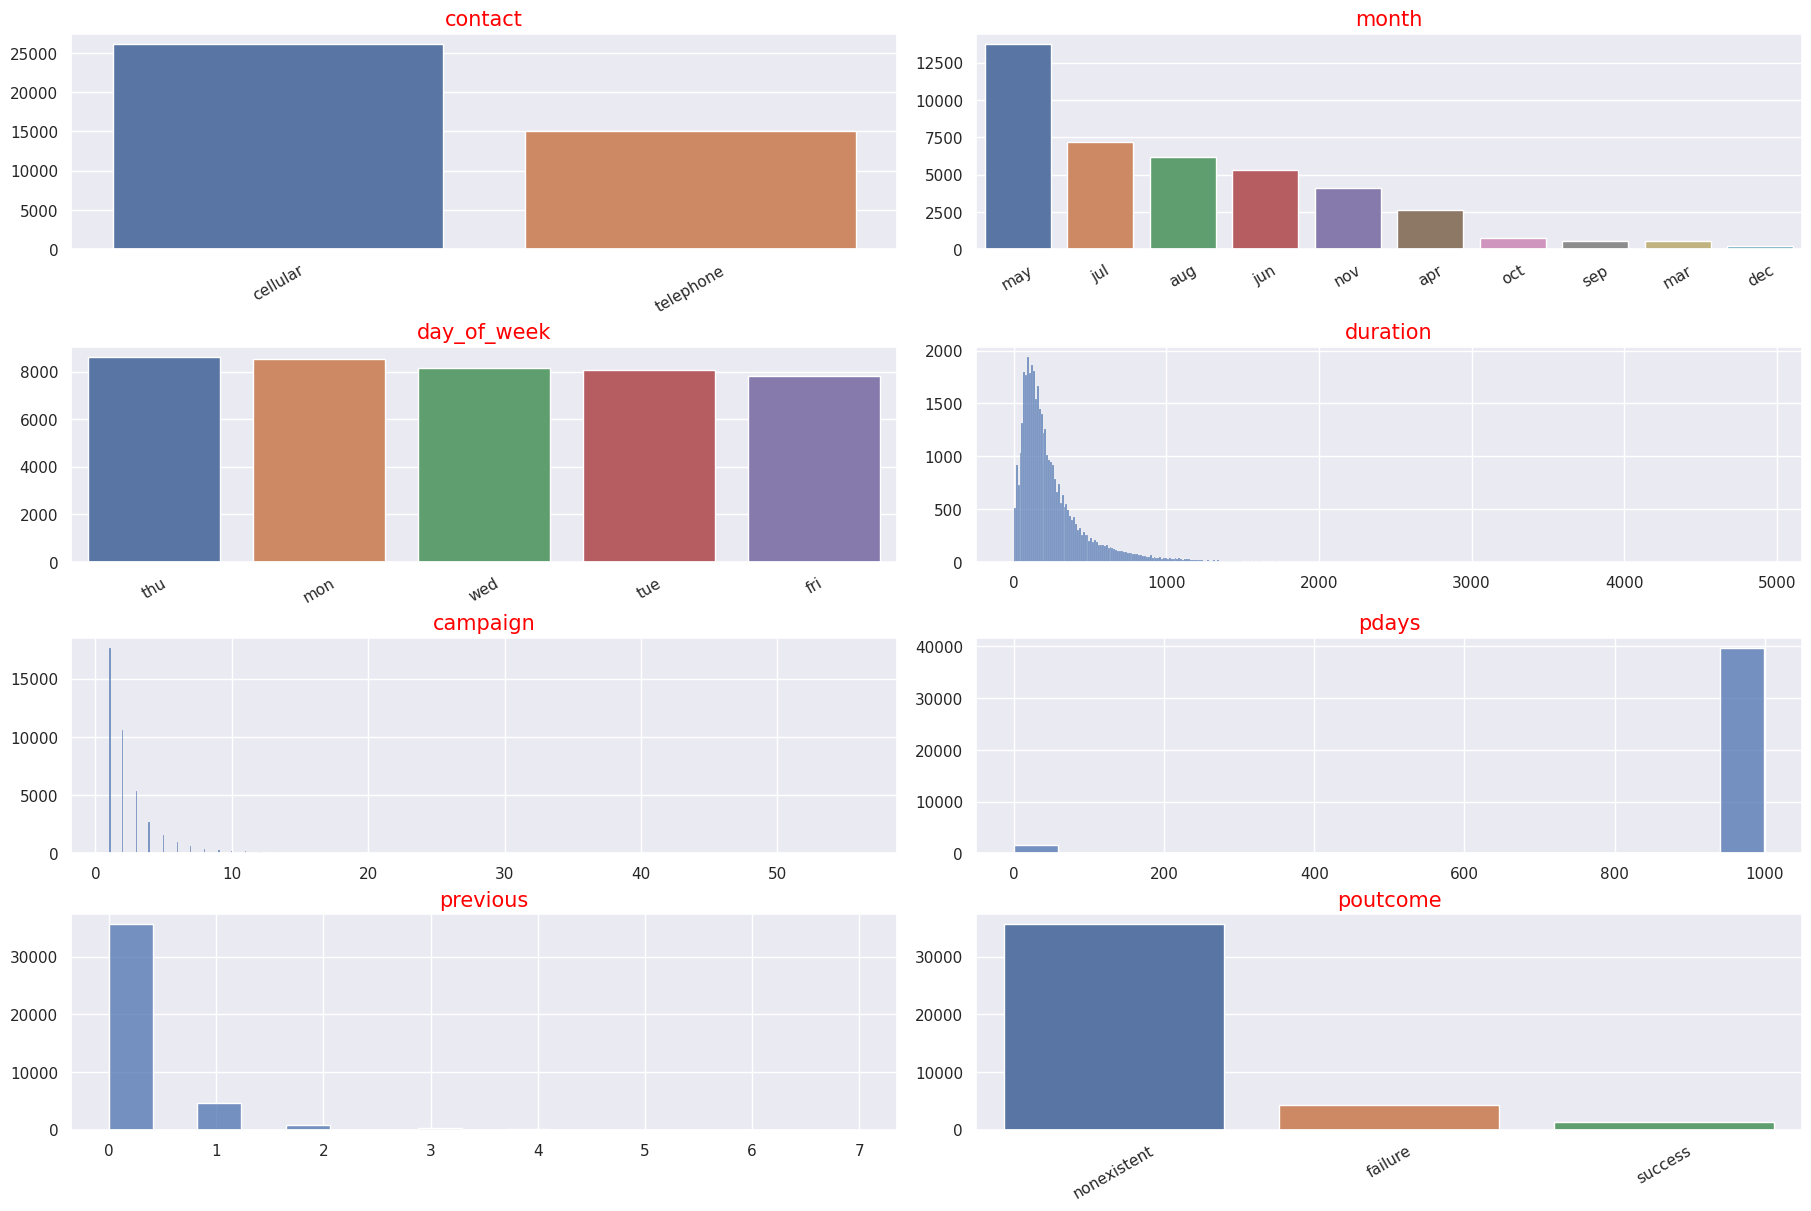

In [18]:
fig, axs = plt.subplots(4,2,figsize = (18,12), constrained_layout = True)
for idx in range(campaign_data.shape[1]):
    r, c = idx // 2, idx % 2
    if campaign_data.columns[idx] in ['duration', 'campaign', 'previous', 'pdays']:
        sns.histplot( data = campaign_data.iloc[:,idx], ax = axs[r,c])
    else:
        data = campaign_data.iloc[:,idx].value_counts()
        sns.barplot(x = data.index, y = data.values , ax = axs[r,c])
        axs[r,c].tick_params(axis = 'x', rotation = 30)
        
    axs[r,c].set_title(f'{campaign_data.columns[idx]}', fontsize = 15, color = 'red')
    axs[r,c].xaxis.label.set_visible(False)
    axs[r,c].yaxis.label.set_visible(False)


<span style="font-size:18px;font-family: Times New Roman;"> **Nhận xét**:</span>
- <span style="font-size:17px;font-family: Times New Roman;">Về thời điểm liên lạc theo ngày thì không có gì bất thường. Nhưng khi nhìn vào phân bố theo tháng thì thấy sự không đối xứng, nhìn vào có thể thấy campaign bắt đầu trong khoảng tháng 5-6 nên số lượng tăng đột biến.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Duration có vài điểm bất thường khi có cuộc gọi 0s và 80p. Cần lưu ý là duration ảnh hưởng lớn kết quả dự đoán, vì sau khi cuộc gọi kết thúc thì đã biết đươc kết quả khách hàng đăng ký hay không. Vậy nên để tránh ảnh hưởng mô hình thì nên không nên sử dụng thuộc tính duration.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Khi nhìn tương quan thì giữa cột pdays và previous thì số lượng khách hàng chưa có liên lạc khá tương đồng nhau. Và poutcome thì giá trị nonexistent chiếm tỷ lệ cao. </span>
- <span style="font-size:17px;font-family: Times New Roman;">**Nhận xét chung thì campaign vừa rồi chưa đạt hiệu quả cao**</span>

# 3. Chuẩn bị dữ liệu

In [19]:
numeric_features = ['age', 'campaign', 'pdays', 'previous', 
                    'emp.var.rate', 'cons.price.idx', 
                    'cons.conf.idx', 'euribor3m', 'nr.employed']
category_features = ['job', 'marital', 'education', 'default', 
                     'housing', 'loan', 'contact',
                     'month', 'day_of_week', 'poutcome']
total_features = numeric_features + category_features

## 3.1 Tiền xử lý giá trị thiếu

<span style="font-size:18px;font-family: Times New Roman;"> **Nhận xét**:</span>
- <span style="font-size:17px;font-family: Times New Roman;">Như đã khám phá ở phần trước thì khách hàng chủ yếu có các khoản vay housing và loan, còn default tương đối ít nên 3 thuộc tính này sẽ hợp lý khi sử dụng giá trị mode. </span>
- <span style="font-size:17px;font-family: Times New Roman;">Các thuộc tính category còn lại như marital, education và job nếu thiếu bỏ những dòng này đi. Đây là thông tin cơ bản nhưng khách hàng từ chối trả lời chứng tỏ khách hàng không nằm trong tập mục tiêu ngân hàng nhắm tới. </span>

In [20]:
bank_df[['housing', 'loan', 'default']] = bank_df[['housing', 
                                                   'loan', 
                                                   'default']].apply(lambda x: x.fillna(x.mode().values[0]))

bank_df = bank_df[~(bank_df[['marital', 'education', 'job']].isna()).any(axis = 1)]

bank_df = bank_df.reset_index().drop(columns = 'index')

### Sự mất cân bằng trong kết quả dự đoán

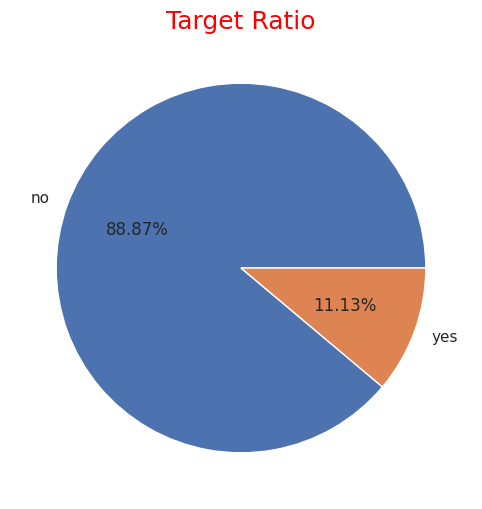

In [21]:
plt.rcParams['figure.figsize'] = 12, 6
ax = bank_df['y'].value_counts().plot.pie(labels = ['no', 'yes'], autopct='%.2f%%')
plt.title('Target Ratio', fontsize = 18, color = 'red')
ax.yaxis.set_visible(False)
plt.show()

<span style="font-size:18px;font-family: Times New Roman;"> **Nhận xét**:</span>
- <span style="font-size:17px;font-family: Times New Roman;">Tỷ lệ giữa các label của target có sự phân bố không đều.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Sử dụng phương pháp Over Sampling(SMOTE)</span>

## 3.2 Chuẩn hóa dữ liệu

In [22]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [23]:
X = bank_df[total_features]
y = bank_df['y']

In [24]:
scale_bank_df = pd.DataFrame()

In [25]:
scale = StandardScaler()
scale_bank_df[numeric_features] = scale.fit_transform(X[numeric_features])
scale_bank_df[numeric_features].head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.57,-0.57,0.19,-0.35,0.65,0.73,0.90,0.71,0.33
1,1.67,-0.57,0.19,-0.35,0.65,0.73,0.90,0.71,0.33
2,-0.28,-0.57,0.19,-0.35,0.65,0.73,0.90,0.71,0.33
3,0.01,-0.57,0.19,-0.35,0.65,0.73,0.90,0.71,0.33
4,1.57,-0.57,0.19,-0.35,0.65,0.73,0.90,0.71,0.33


## 3.3 Mã hóa dữ liệu

In [26]:
X = pd.concat((scale_bank_df,pd.get_dummies(X[category_features])), axis = 1)
X.head()  

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.57,-0.57,0.19,-0.35,0.65,0.73,0.90,0.71,0.33,False,...,False,False,False,True,False,False,False,False,True,False
1,1.67,-0.57,0.19,-0.35,0.65,0.73,0.90,0.71,0.33,False,...,False,False,False,True,False,False,False,False,True,False
2,-0.28,-0.57,0.19,-0.35,0.65,0.73,0.90,0.71,0.33,False,...,False,False,False,True,False,False,False,False,True,False
3,0.01,-0.57,0.19,-0.35,0.65,0.73,0.90,0.71,0.33,True,...,False,False,False,True,False,False,False,False,True,False
4,1.57,-0.57,0.19,-0.35,0.65,0.73,0.90,0.71,0.33,False,...,False,False,False,True,False,False,False,False,True,False


## 3.4 Over Sampling với SMOTE

- <span style="font-size:17px;font-family: Times New Roman;">SMOTE là một kỹ thuật sinh mẫu trong đó các mẫu tổng hợp được tạo ra cho lớp thiểu số. Thuật toán này giúp khắc phục vấn đề overfitting do lấy mẫu quá mức ngẫu nhiên. </span>
- <span style="font-size:17px;font-family: Times New Roman;">Nó tập trung vào không gian đặc trưng để tạo ra các trường hợp mới với sự trợ giúp của phép nội suy giữa các trường hợp tích cực nằm với nhau.</span>

- <span style="font-size:17px;font-family: Times New Roman;">Mặc dù thuật toán này khá hữu ích, nhưng nó có một số nhược điểm đi kèm với nó.</span>
    - <span style="font-size:17px;font-family: Times New Roman;">Các thể hiện tổng hợp được tạo ra theo cùng một hướng. Điều này làm phức tạp không gian quyết định được tạo ra bởi một số thuật toán phân loại.</span>
    - <span style="font-size:17px;font-family: Times New Roman;">SMOTE có xu hướng tạo mẫu không riêng biệt nên có thể tạo ra mẫu trùng hoặc nhiễu.</span>

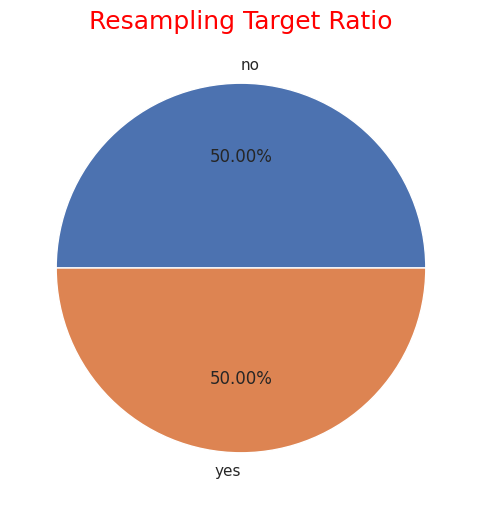

In [27]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

plt.rcParams['figure.figsize'] = 12, 6
ax = y_smote.value_counts().plot.pie(labels = ['no', 'yes'], autopct='%.2f%%')
plt.title('Resampling Target Ratio', fontsize = 18, color = 'red')
ax.yaxis.set_visible(False)
plt.show()

# 4. Xây dựng mô hình dự báo.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

<span style="font-size:18px;font-family: Times New Roman;">**Tóm tắt:**</span>
- <span style="font-size:17px;font-family: Times New Roman;">Chia dữ liệu thành 3 phần: train, validation và test với tỷ lệ là 7:2:1</span>
- <span style="font-size:17px;font-family: Times New Roman;">Nhóm sẽ đánh giá độ chính xác dựa trên accuracy, precision, recall để đánh giá hiệu quả của mô hình.</span>

In [29]:
y_smote.replace(['yes', 'no'], [1,0], inplace=True)
X_smote = np.asarray(X_smote).astype(np.float32)
y_smote = np.asarray(y_smote).astype(np.float32)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## 4.1 Logistic Regression

In [31]:
logistic_model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
logistic_model.fit(X_train, y_train);

In [32]:
# Đánh giá tập validation
y_val_pred = logistic_model.predict(X_val)
print(classification_report(y_val_pred, y_val))

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      6782
         1.0       0.87      0.96      0.91      5754

    accuracy                           0.92     12536
   macro avg       0.92      0.92      0.92     12536
weighted avg       0.92      0.92      0.92     12536



In [33]:
# Đánh giá tập test
y_test_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3450
         1.0       0.97      0.87      0.92      3515

    accuracy                           0.92      6965
   macro avg       0.93      0.92      0.92      6965
weighted avg       0.93      0.92      0.92      6965



<span style="font-size:18px;font-family: Times New Roman;">**Nhận xét:**</span>
- <span style="font-size:17px;font-family: Times New Roman;">Kết quả dữ đoán tốt trên cả tập trên validation và tập test.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Kết quả dự đoán trên tập test của nhóm thiểu số (label = 1) có độ chính xác cao. Đây là điều mà mô hình chúng ta hướng tới. </span>

### Đánh giá bằng ROC curve
<span style="font-size:17px;font-family: Times New Roman;">Đường cong ROC trong hồi quy logistic được sử dụng để xác định giá trị ngưỡng tốt nhất để dự đoán liệu một quan sát mới là "thất bại" (0) hay "thành công" (1).</span>

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [35]:
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = logistic_model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

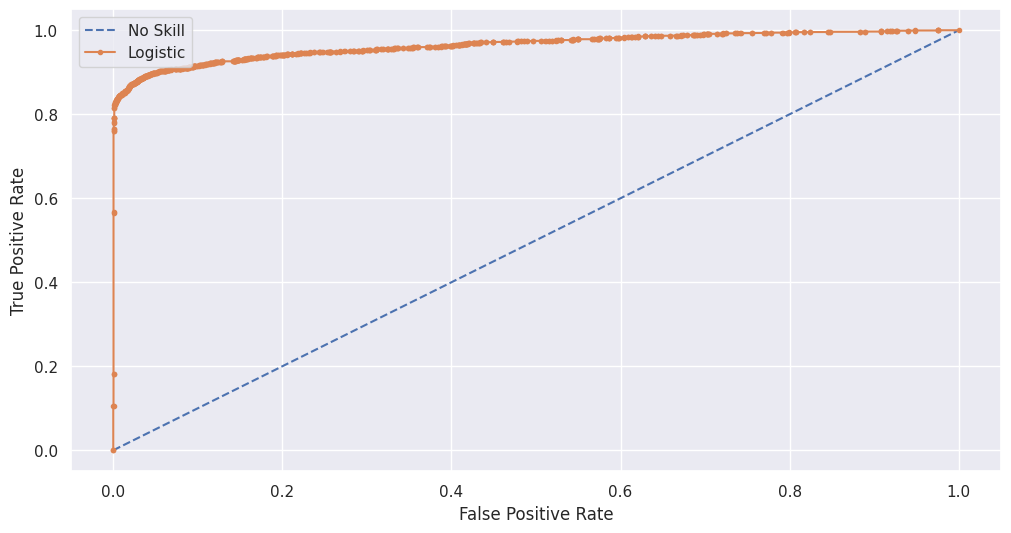

In [36]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

<span style="font-size:18px;font-family: Times New Roman;">**Nhận xét:**</span>
- <span style="font-size:17px;font-family: Times New Roman;">Bằng ROC curve, đường logistic nằm hầu hết ở biên trái và trên. Từ đó kết quả mô hình sẽ tốt kể cả khi xuất hiện dữ liệu mới.</span>

## 4.2 Deep learning ANN

In [44]:
from keras import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model

In [38]:
model = Sequential()
# layers
model.add(Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))
# compile
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3648      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [39]:
# checkpoint to save the best model
model_checkpoint_callback = ModelCheckpoint(
    filepath = './',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [40]:
history = model.fit(X_train, y_train, epochs=10, batch_size = 10, 
          validation_data=(X_val,y_val), callbacks=[model_checkpoint_callback]);

Epoch 1/10
5015/5015 [==============================] - 5s 957us/step - loss: 0.3178 - accuracy: 0.8673 - val_loss: 0.2209 - val_accuracy: 0.9138
Epoch 2/10
5015/5015 [==============================] - 5s 935us/step - loss: 0.2255 - accuracy: 0.9133 - val_loss: 0.2090 - val_accuracy: 0.9166
Epoch 3/10
5015/5015 [==============================] - 5s 917us/step - loss: 0.2144 - accuracy: 0.9180 - val_loss: 0.2077 - val_accuracy: 0.9200
Epoch 4/10
5015/5015 [==============================] - 5s 924us/step - loss: 0.2082 - accuracy: 0.9200 - val_loss: 0.2059 - val_accuracy: 0.9174
Epoch 5/10
5015/5015 [==============================] - 5s 933us/step - loss: 0.2055 - accuracy: 0.9217 - val_loss: 0.2118 - val_accuracy: 0.9187
Epoch 6/10
5015/5015 [==============================] - 5s 921us/step - loss: 0.2034 - accuracy: 0.9219 - val_loss: 0.2081 - val_accuracy: 0.9169
Epoch 7/10
5015/5015 [==============================] - 5s 926us/step - loss: 0.1996 - accuracy: 0.9226 - val_loss: 0.2028 -

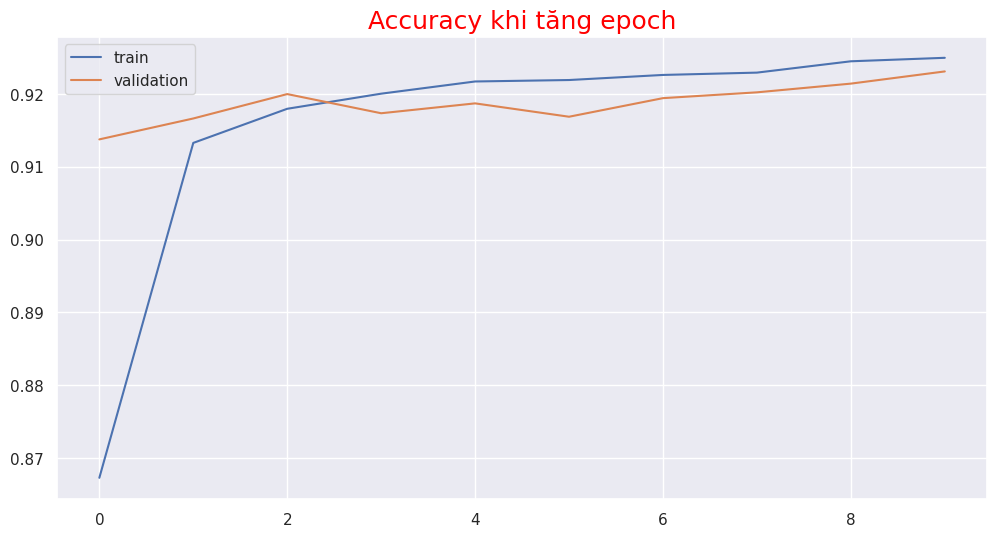

In [41]:
plt.rcParams['figure.figsize'] = 12, 6
plt.plot(np.arange(10), history.history['accuracy'], label = 'train')
plt.plot(np.arange(10), history.history['val_accuracy'], label = 'validation')
plt.title('Accuracy khi tăng epoch', fontsize = 18, color = 'red')
plt.legend()
plt.show()

In [42]:
# save model
model.save('./ANN')

2023-05-14 16:37:56.795703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-05-14 16:37:56.803595: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,128]
	 [[{{node inputs}}]]
2023-05-14 16:37:56.811306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-05-14 16:37:5

INFO:tensorflow:Assets written to: ./ANN/assets


INFO:tensorflow:Assets written to: ./ANN/assets


In [43]:
# Đánh giá kết quả trên tập test
model = load_model('ANN')
metrics = model.evaluate(X_test, y_test)
print(classification_report(np.round(model.predict(X_test),0),y_test))

218/218 [==============================] - 0s 492us/step
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      3709
         1.0       0.89      0.96      0.92      3256

    accuracy                           0.93      6965
   macro avg       0.93      0.93      0.93      6965
weighted avg       0.93      0.93      0.93      6965



<span style="font-size:18px;font-family: Times New Roman;">**Nhận xét:**</span>
- <span style="font-size:17px;font-family: Times New Roman;">Mô hình dự báo tốt trên cả tập validation và tập test. Độ đo precision và recall rất cao( trên 90%) </span>    
- <span style="font-size:17px;font-family: Times New Roman;">Kết quả dự đoán cho label = 1 thấp hơn mô hình Logistic Regression. Nhưng nhìn tổng thể các chỉ số còn lại thì đều tốt hơn Logistic Regression </span>
- <span style="font-size:17px;font-family: Times New Roman;">Có thể tốt hơn bằng cách tăng số lượng epoch và giảm số lượng batch_size nhưng không nên quá chênh lệch vì có thể dẫn tới overfitting </span>

# 5. Trả lời câu hỏi.

<span style="font-size:18px;font-family: Times New Roman;">Với những câu hỏi về tiêu chí đánh giá và độ đo thì nhóm đã trình bày ở trên nên nhóm sẽ chỉ trả lời những câu hỏi phía dưới.</span>

<span style="font-size:20px;font-family: Times New Roman;">**Làm thế nào để xác định mô hình có quá khớp hay không? Nguyên nhân và các giải pháp khác nhau để tránh/giảm quá khớp?** </span>
- <span style="font-size:17px;font-family: Times New Roman;">Dựa vào kết quả mô hình, nếu mô hình quá tốt trên tập train và validation nhưng kết quả không tốt tập test thì mô hình đang bị overfitting.</span>
- <span style="font-size:17px;font-family: Times New Roman;">Nguyên nhân thì có nhiều nhưng nhóm em nhận thấy sẽ đến từ việc: dữ liệu không đủ và chọn cách huấn luyện mô hình. Cụ thể là data quá ít không đủ bao phủ phần lớn dữ liệu mẫu hay việc huấn luyện quá kỹ dẫn đến tình trạng lazy và kết quả bị overfitting. </span>
- <span style="font-size:17px;font-family: Times New Roman;">Cách giải quyết:</span>
    - <span style="font-size:17px;font-family: Times New Roman;">Feature selection: cân nhắc sử dụng những thuộc tính cần thiết, hạn chế đa cộng tuyến.</span>
    - <span style="font-size:17px;font-family: Times New Roman;">Tăng số lượng regularization.</span>

<span style="font-size:20px;font-family: Times New Roman;">**Làm thế nào để biết mô hình bị ảnh hưởng bởi nhiễu? (Giả sử rằng việc loại bỏ nhiễu đã được thực hiện trong giai đoạn tiền xử lý)**</span>
- <span style="font-size:17px;font-family: Times New Roman;">Theo nhóm tìm hiểu thì một mô hình không bị ảnh hưởng bởi outlier là mô hình cố gắng tổi thiểu hóa False Position(FP) và tối đa hóa độ đo recall. Dựa vào ROC curve sẽ  giúp chúng ta dễ quan sát.</span>

<span style="font-size:20px;font-family: Times New Roman;">**Nếu kết quả không như mong đợi, điều gì cần phải làm tiếp theo? Cung cấp ví dụ cho mỗi trường hợp khác nhau.**</span>
- <span style="font-size:17px;font-family: Times New Roman;">Thu thập thêm dữ liệu</span>
- <span style="font-size:17px;font-family: Times New Roman;">Tìm hiểu các tham số của mô hình để có thể fine-tuning thuật toán </span>
- <span style="font-size:17px;font-family: Times New Roman;">Nếu kết quả vẫn không hiệu quả thì nên lựa chọn mô hình khác phù hợp hơn.</span>

<span style="font-size:20px;font-family: Times New Roman;">**Có thể cải thiện hiệu suất của mô hình mà không thay đổi kiến trúc và các tham số đã học được không**</span>
- <span style="font-size:17px;font-family: Times New Roman;">Có thể, điều này phụ thuộc vào độ sâu của bản thân vào domain của bài toán. Nhiều bài toán vẫn có thể dựa vào domain và statistic để dự báo kết quả, và machine learning chỉ đóng vai trò kiểm tra và tiết kiệm thời gian.</span>

<span style="font-size:20px;font-family: Times New Roman;">**Sau khi đánh giá kết quả, chúng có thể được sử dụng ngay trong thực tế không? Cần xem xét những điều gì?**</span>
- <span style="font-size:17px;font-family: Times New Roman;">Chứng ta có thể đưa vào thực tế nếu sau khi kiểm tra trên tập test với kết quả đủ tốt và phải lưu ý một số điểm sau:</span>
    - <span style="font-size:17px;font-family: Times New Roman;">Khi nào cần huấn luyện tăng cường lại mô hình. Dữ liệu huấn luyện có thêm thuộc tính nào mới không ?</span>
    - <span style="font-size:17px;font-family: Times New Roman;">Mô hình còn hoạt động tốt (độ chính xác và thời gian) khi dữ liệu đầu vào ngày càng lớn.</span>